<a href="https://colab.research.google.com/github/penkovgd/itmo-ml-course/blob/main/lab6_nn_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Нейронные сети (PyTorch)

В данной лабораторной работе мы научимся работать с PyTorch.

По нейронным сетям в интернете можно найти огромное количество информации и примеров (официальная документация фреймворка, Kaggle, даже ChatGPT, хотя последний стоит использовать с осторожностью) - вы можете использовать любые материалы в текущей работе, но будьте готовы ответить на вопросы по коду во время защиты.

Вспомогательные материалы:

[Курс по нейронным сетям](https://stepik.org/course/110281/syllabus)

[ШАД-овский курс по глубокому обучению](https://github.com/yandexdataschool/Practical_DL/tree/fall23)

[Неплохой курс чисто про PyTorch](https://www.learnpytorch.io/)

[Документация PyTorch](https://pytorch.org/)

В целом, содержательно данная работа дублирует часть курса по Глубокому обучению.


## Введение в PyTorch (3 балла)

С точки зрения синтаксиса PyTorch похож на NumPy, основная разница заключается в том, что данный фреймворк предназначен для автоматического расчета градиентов. [Вот тут](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users) можно почитать про то, как соотносятся две эти библиотеки.

In [ ]:
import os
import re
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm.notebook import tqdm
from collections import defaultdict

import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
import torchvision
from torchvision.transforms import transforms

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize, sent_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mihaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### 1

1. Создайте два вещественных тензора: $a$ размером (10, 2) и $b$ размером (, 20)

2. Создайте тензор c, являющийся тензором $b$, но размера (2, 2, 5)

3. Выведите первый столбец матрицы $a$ с помощью индексации

4. Создайте тензор $d$, являющийся тензором $b$, но размера (10, 2). Произведите все арифметические операции с тензорами $a$ и $d$

In [ ]:
from torch import tensor

# 1
a = tensor(
    [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
)
print(a.shape)
a

torch.Size([10, 2])


tensor([[1, 2],
        [1, 2],
        [1, 2],
        [1, 2],
        [1, 2],
        [1, 2],
        [1, 2],
        [1, 2],
        [1, 2],
        [1, 2]])

In [ ]:
# 1
b = torch.rand(size=(20,))
print(b.shape)
b

torch.Size([20])


tensor([0.3739, 0.3441, 0.4632, 0.8903, 0.7189, 0.5815, 0.6116, 0.1018, 0.6323,
        0.0536, 0.4834, 0.5291, 0.8173, 0.7308, 0.5027, 0.7717, 0.5214, 0.7136,
        0.7805, 0.5082])

In [ ]:
# 2
c = b.view((2, 2, 5))
print(c.shape)
c

torch.Size([2, 2, 5])


tensor([[[0.3739, 0.3441, 0.4632, 0.8903, 0.7189],
         [0.5815, 0.6116, 0.1018, 0.6323, 0.0536]],

        [[0.4834, 0.5291, 0.8173, 0.7308, 0.5027],
         [0.7717, 0.5214, 0.7136, 0.7805, 0.5082]]])

In [ ]:
# 3
a[:, 0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# 4
d = b.view((10, 2))
d

tensor([[0.3739, 0.3441],
        [0.4632, 0.8903],
        [0.7189, 0.5815],
        [0.6116, 0.1018],
        [0.6323, 0.0536],
        [0.4834, 0.5291],
        [0.8173, 0.7308],
        [0.5027, 0.7717],
        [0.5214, 0.7136],
        [0.7805, 0.5082]])

In [ ]:
a + d, a - d

(tensor([[1.3739, 2.3441],
         [1.4632, 2.8903],
         [1.7189, 2.5815],
         [1.6116, 2.1018],
         [1.6323, 2.0536],
         [1.4834, 2.5291],
         [1.8173, 2.7308],
         [1.5027, 2.7717],
         [1.5214, 2.7136],
         [1.7805, 2.5082]]),
 tensor([[0.6261, 1.6559],
         [0.5368, 1.1097],
         [0.2811, 1.4185],
         [0.3884, 1.8982],
         [0.3677, 1.9464],
         [0.5166, 1.4709],
         [0.1827, 1.2692],
         [0.4973, 1.2283],
         [0.4786, 1.2864],
         [0.2195, 1.4918]]))

In [ ]:
a * d, a / d

(tensor([[0.3739, 0.6882],
         [0.4632, 1.7807],
         [0.7189, 1.1629],
         [0.6116, 0.2035],
         [0.6323, 0.1071],
         [0.4834, 1.0582],
         [0.8173, 1.4616],
         [0.5027, 1.5433],
         [0.5214, 1.4273],
         [0.7805, 1.0164]]),
 tensor([[ 2.6745,  5.8126],
         [ 2.1591,  2.2463],
         [ 1.3910,  3.4396],
         [ 1.6351, 19.6516],
         [ 1.5816, 37.3450],
         [ 2.0686,  3.7800],
         [ 1.2235,  2.7367],
         [ 1.9892,  2.5918],
         [ 1.9181,  2.8025],
         [ 1.2813,  3.9353]]))

In [ ]:
mm = a.type(torch.float32) @ d.T
mm, mm.shape

(tensor([[1.0620, 2.2438, 1.8818, 0.8151, 0.7394, 1.5416, 2.2789, 2.0461, 1.9486,
          1.7969],
         [1.0620, 2.2438, 1.8818, 0.8151, 0.7394, 1.5416, 2.2789, 2.0461, 1.9486,
          1.7969],
         [1.0620, 2.2438, 1.8818, 0.8151, 0.7394, 1.5416, 2.2789, 2.0461, 1.9486,
          1.7969],
         [1.0620, 2.2438, 1.8818, 0.8151, 0.7394, 1.5416, 2.2789, 2.0461, 1.9486,
          1.7969],
         [1.0620, 2.2438, 1.8818, 0.8151, 0.7394, 1.5416, 2.2789, 2.0461, 1.9486,
          1.7969],
         [1.0620, 2.2438, 1.8818, 0.8151, 0.7394, 1.5416, 2.2789, 2.0461, 1.9486,
          1.7969],
         [1.0620, 2.2438, 1.8818, 0.8151, 0.7394, 1.5416, 2.2789, 2.0461, 1.9486,
          1.7969],
         [1.0620, 2.2438, 1.8818, 0.8151, 0.7394, 1.5416, 2.2789, 2.0461, 1.9486,
          1.7969],
         [1.0620, 2.2438, 1.8818, 0.8151, 0.7394, 1.5416, 2.2789, 2.0461, 1.9486,
          1.7969],
         [1.0620, 2.2438, 1.8818, 0.8151, 0.7394, 1.5416, 2.2789, 2.0461, 1.9486,
         

### 2

1. Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2. Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки * 2. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pyplot`  

3. Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

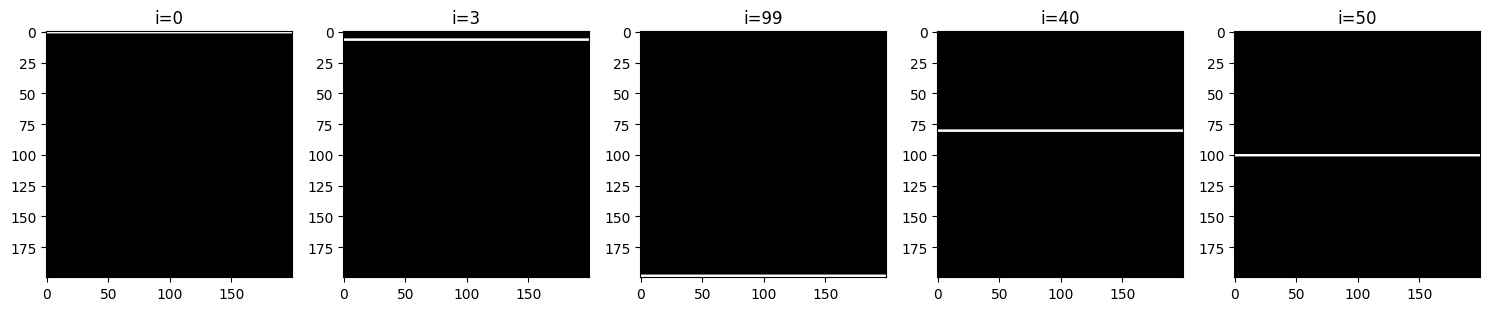

In [ ]:
images = torch.zeros((100, 200, 200, 3))

stripe_width = 1
i_range = [0, 3, 99, 40, 50]

for i in i_range:
    stripe_start_idx = i * 2
    stripe_end_idx = stripe_start_idx + stripe_width + 1
    images[i, stripe_start_idx:stripe_end_idx, :, :] = 255.0

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for ax, i in zip(axes, i_range):
    ax.imshow(images[i].type(torch.int32))
    ax.set_title(f"i={i}")

plt.tight_layout()
plt.show()

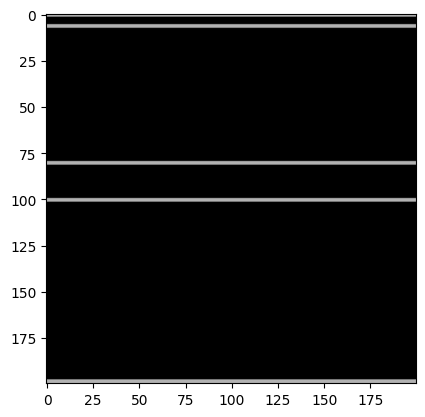

In [ ]:
mean_image = images.mean(dim=0)
mean_image *= 70
plt.imshow(mean_image.type(torch.int32))

### 3

1. Смените среду выполнения на GPU (в Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`))

2. Объявите тензор $a$ размера (2, 3, 4) и тензор $b$ размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)

3. Измените форму тензора $b$, чтобы она совпадала с формой тензора $a$, получите тензор $c$.

4. Переместите тензоры $a$ и $c$ на CPU.

5. Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент $L$ по $c$ ( то есть $\frac{\partial{L}}{\partial{c}})$. Выведите градиент $L$ по $c$. Также вычислите его вручную, чтобы проверить себя.

In [ ]:
a = torch.empty((2, 3, 4), device=device).uniform_(1, 10)
b = torch.empty((1, 8, 3), device=device).uniform_(1, 10)

c = b.reshape((2, 3, 4))

a = a.cpu()
c = c.cpu().clone().detach().requires_grad_()


L = torch.mean((c - a) ** 2)
L.backward()
print(c.grad)

tensor([[[-0.1154,  0.4495,  0.2730, -0.4630],
         [ 0.0290, -0.1108,  0.3137,  0.1323],
         [-0.1344,  0.1310, -0.2887, -0.2539]],

        [[ 0.5074, -0.0785, -0.0399,  0.4542],
         [-0.0105, -0.0160,  0.3210, -0.6013],
         [-0.5217,  0.4979,  0.1272, -0.1402]]])


In [ ]:
dLdc = 2 / c.numel() * (c - a)
dLdc

tensor([[[-0.1154,  0.4495,  0.2730, -0.4630],
         [ 0.0290, -0.1108,  0.3137,  0.1323],
         [-0.1344,  0.1310, -0.2887, -0.2539]],

        [[ 0.5074, -0.0785, -0.0399,  0.4542],
         [-0.0105, -0.0160,  0.3210, -0.6013],
         [-0.5217,  0.4979,  0.1272, -0.1402]]], grad_fn=<MulBackward0>)

## Основы нейронных сетей (5 баллов)

Кратко обсудим основные концепции, понимание которых необходимо для работы с PyTorch. В других фреймворках для нейронных сетей всё очень похоже.

1. **Датасеты**
  
  В PyTorch датасеты представлены классами `torch.utils.data.Dataset` или его наследниками. Они позволяют загружать данные и предоставляют доступ к ним для обучения и валидации.

2. **Нейронные сети**

  *Слои*

  Нейронные сети в PyTorch строятся с использованием `torch.nn.Module` (не единственный, но самый распространенный способ). Слои определяются внутри этих модулей и могут быть полносвязными (`torch.nn.Linear`), сверточными (`torch.nn.Conv2d`), рекуррентными (`torch.nn.LSTM`, `torch.nn.GRU`) и другими. Сло имеют входную и выходную размерность. В нейронной сети выходная размерность слоя должна быть равна входной размерности последующего слоя.

  *Функции активации*

  Функции активации, такие как ReLU (`torch.nn.ReLU`), Sigmoid (`torch.nn.Sigmoid`), Tanh (`torch.nn.Tanh`) и другие, применяются к выходу слоя для добавления нелинейности в сеть.

  *Лосс-функции*

  Лосс-функции измеряют расхождение между прогнозами модели и фактическими значениями. В зависимости от типа задачи могут использоваться различные функции активации, например, `torch.nn.CrossEntropyLoss` для классификации и `torch.nn.MSELoss` для регрессии.

  *Оптимизаторы*

  Оптимизаторы в PyTorch, такие как `torch.optim.SGD`, `torch.optim.Adam`, `torch.optim.Adagrad` и другие, используются для обновления параметров сети в процессе обучения с целью минимизации функции потерь.

  *Планировщики (шедулеры)*

  Планировщики позволяют динамически изменять скорость обучения в процессе обучения. Например, `torch.optim.lr_scheduler.ReduceLROnPlateau` уменьшает скорость обучения, если ошибка перестает уменьшаться, а `torch.optim.lr_scheduler.StepLR` или `torch.optim.lr_scheduler.CosineAnnealingLR` изменяют скорость обучения в заданные моменты или с периодическим расписанием.

3. **Обучение и валидация**

  Обучение модели включает в себя передачу данных через сеть, вычисление функции потерь, вычисление градиентов, обновление весов с использованием оптимизатора и повторение этого процесса на протяжении нескольких эпох. После обучения модели необходимо провести валидацию на независимом наборе данных для оценки ее производительности.

[Визуализация работы нейронных сетей](https://playground.tensorflow.org/).

Потренируемся писать полный цикл обучения нейронной сети на [следующем наборе данных](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

P.S. предлагаемая архитектура сети не является оптимальной, но позволяет научиться работать с основными строительными блоками PyTorch-а.

Прочитайте датасет (можно использовать библиотеку `opendatasets` для выгрузки данных с Kaggle). Посчитайте основные числовые характеристики для каждого столбца. Проанализируйте датасет на предмет дисбаланса классов. Сделайте вывод о необходимости каких-либо преобразований над данными.

Разбейте выборку на тренировочную и тестовую (`test_size=0.2, random_state=42`), проведите необходимые преобразования.

In [ ]:
%pip install opendatasets -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# # import opendatasets as od

# od.download("https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data")

In [ ]:
df = pd.read_csv("data.csv")
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [ ]:
df.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [ ]:
# Предобработка
df = df.drop(columns=["id", "Unnamed: 32"])
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

Создайте класс датасета. Типы данных, которые вам потребуются: `dtype=torch.float32`, `dtype=torch.long`.

Инициализируйте даталоадеры (`batch_size=32`) для тренировочных и тестовых данных. Для теста данные перемешивать (параметр `shuffle`) не надо!

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, dataframe, feature_columns, target_column):
        self.data = torch.from_numpy(dataframe.values).type(torch.float32)
        self.data = torch.from_numpy(dataframe[feature_columns].values).type(
            torch.float32
        )
        self.target = torch.from_numpy(dataframe[target_column].values)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.target[idx]


features = df.columns.drop("diagnosis")
dataset = CustomDataset(df, feature_columns=features, target_column="diagnosis")

train_dataset, test_dataset = random_split(dataset, [0.8, 0.2])


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)


Создайте полносвязную нейронную сеть из нескольких слоёв. Между слоями используйте ReLU.

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.input_size = input_size
        self.output_size = output_size

        self.layer_1 = nn.Linear(input_size, 100)
        self.activation = nn.ReLU()
        self.layer_2 = nn.Linear(100, output_size)

    def forward(self, x):
        layer_1_preact = self.layer_1(x)
        layer_1_act = self.activation(layer_1_preact)
        output = self.layer_2(layer_1_act)
        return output


Следующий небольшой кусочек кода написан за вас. В нём используется кросс-энтропия в качестве функции потерь. Вспомните, какими характеристиками обладает данная функция и в чём особенность её реализации в PyTorch.

Письменно ответьте на вопрос, как сигмоидальная функция потерь соотносится с кросс-энтропийной.

In [ ]:
model = NeuralNetwork(input_size=df.shape[1] - 1, output_size=2).to(
    device
)  # -1 за счет таргета
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

Ваш ответ: Сигмоидная функция потерь (сигмоида + BCEloss) это вариант обычной кросс энтропии, если стоит задача бинарной классификации, и вместо Softmax используется сигмоида.

Напишите функции для тренировки и тестирования модели. Не забудьте про `optimizer.zero_grad()` при тренировке и `with torch.no_grad()` в тесте.

Также обратите внимание, что шаг планировщика нужно совершать после шага оптимизатора.

In [ ]:
def train(model, train_loader, criterion, optimizer, scheduler, device):
    model.train()
    running_loss = []
    correct_train = 0
    total_train = 0

    for inputs, labels in tqdm(train_loader):
        # Перемещение данных на устройство (GPU или CPU)
        inputs = inputs.to(device)
        labels = labels.to(device)
        # Обнуление градиентов параметров модели
        optimizer.zero_grad()
        # Прямой проход: получение прогнозов от модели
        outputs = model(inputs)
        # Вычисление значения функции потерь
        loss = criterion(outputs, labels)
        # Обратное распространение: вычисление градиентов
        loss.backward()
        # Обновление параметров модели с помощью оптимизатора
        optimizer.step()
        # Вычисление точности модели (Accuracy)
        correct_train += (outputs.argmax(dim=1) == labels).sum().item()
        total_train += labels.shape[0]
        # Аккумулирование потерь по батчам
        running_loss.append(loss.item())

    # Вычисление средней потери и точности на тренировочном наборе данных
    train_loss = np.mean(running_loss)
    train_accuracy = correct_train / total_train
    # Обновление шага расписания (scheduler)
    scheduler.step()
    return train_loss, train_accuracy


def test(model, test_loader, criterion, device):
    model.eval()
    running_loss = []
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        # Проход по данным тестового загрузчика
        for inputs, labels in tqdm(test_loader, leave=False):
            # Перемещение данных на устройство (GPU или CPU)
            inputs = inputs.to(device)
            labels = labels.to(device)
            # Получение прогнозов от модели
            outputs = model(inputs)
            # Вычисление значения функции потерь
            loss = criterion(outputs, labels)
            # Вычисление точности модели (Accuracy)
            correct_test += (outputs.argmax(dim=1) == labels).sum().item()
            total_test += labels.shape[0]
            # Аккумулирование потерь по батчам
            running_loss.append(loss.item())
    # Вычисление средней потери и точности на тестовом наборе данных
    test_loss = np.mean(running_loss)
    test_accuracy = correct_test / total_test

    return test_loss, test_accuracy

Создайте цикл обучения вашей нейронной сети, используя написанные ранее функции.

Печатайте прогресс на каждой эпохе (`train_loss, train_accuracy, test_loss, test_accuracy`).

Постройте графики лосса и точности. Должно получиться что-то такое:

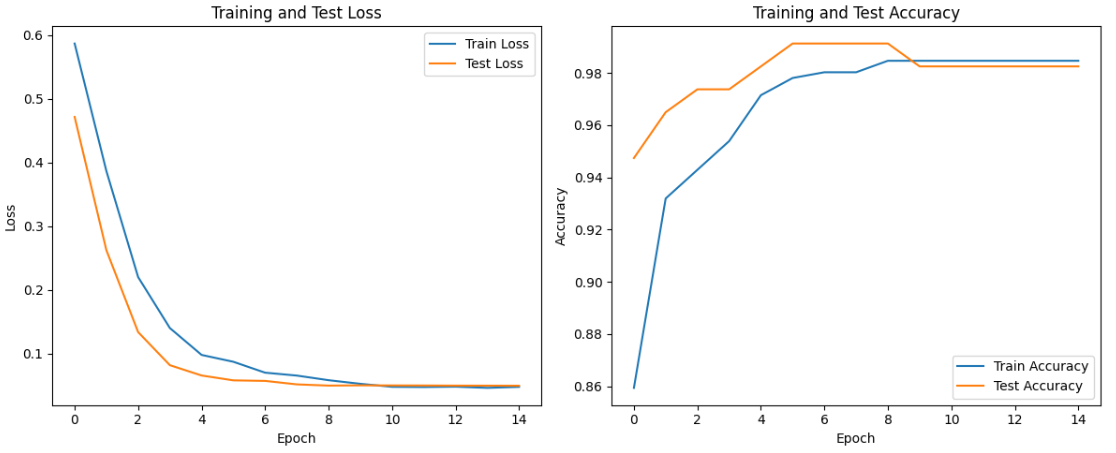

In [ ]:
num_epochs = 15
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    train_loss, train_accuracy = train(
        model, train_loader, criterion, optimizer, scheduler, device
    )
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    test_loss, test_accuracy = test(model, test_loader, criterion, device)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

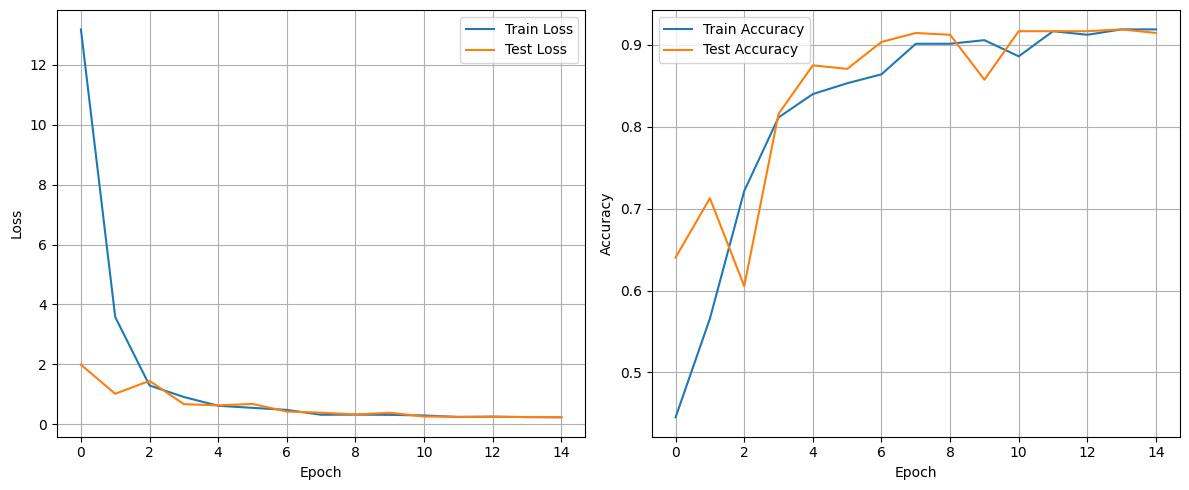

In [ ]:
plt.figure(figsize=(12, 5))
epochs = range(num_epochs)

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label="Train Accuracy")
plt.plot(epochs, test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
torch.save(
    model.state_dict(), "model_checkpoint.pth"
)  # можно сохранить модель по итогу обучения

## Специальные архитектуры нейронных сетей

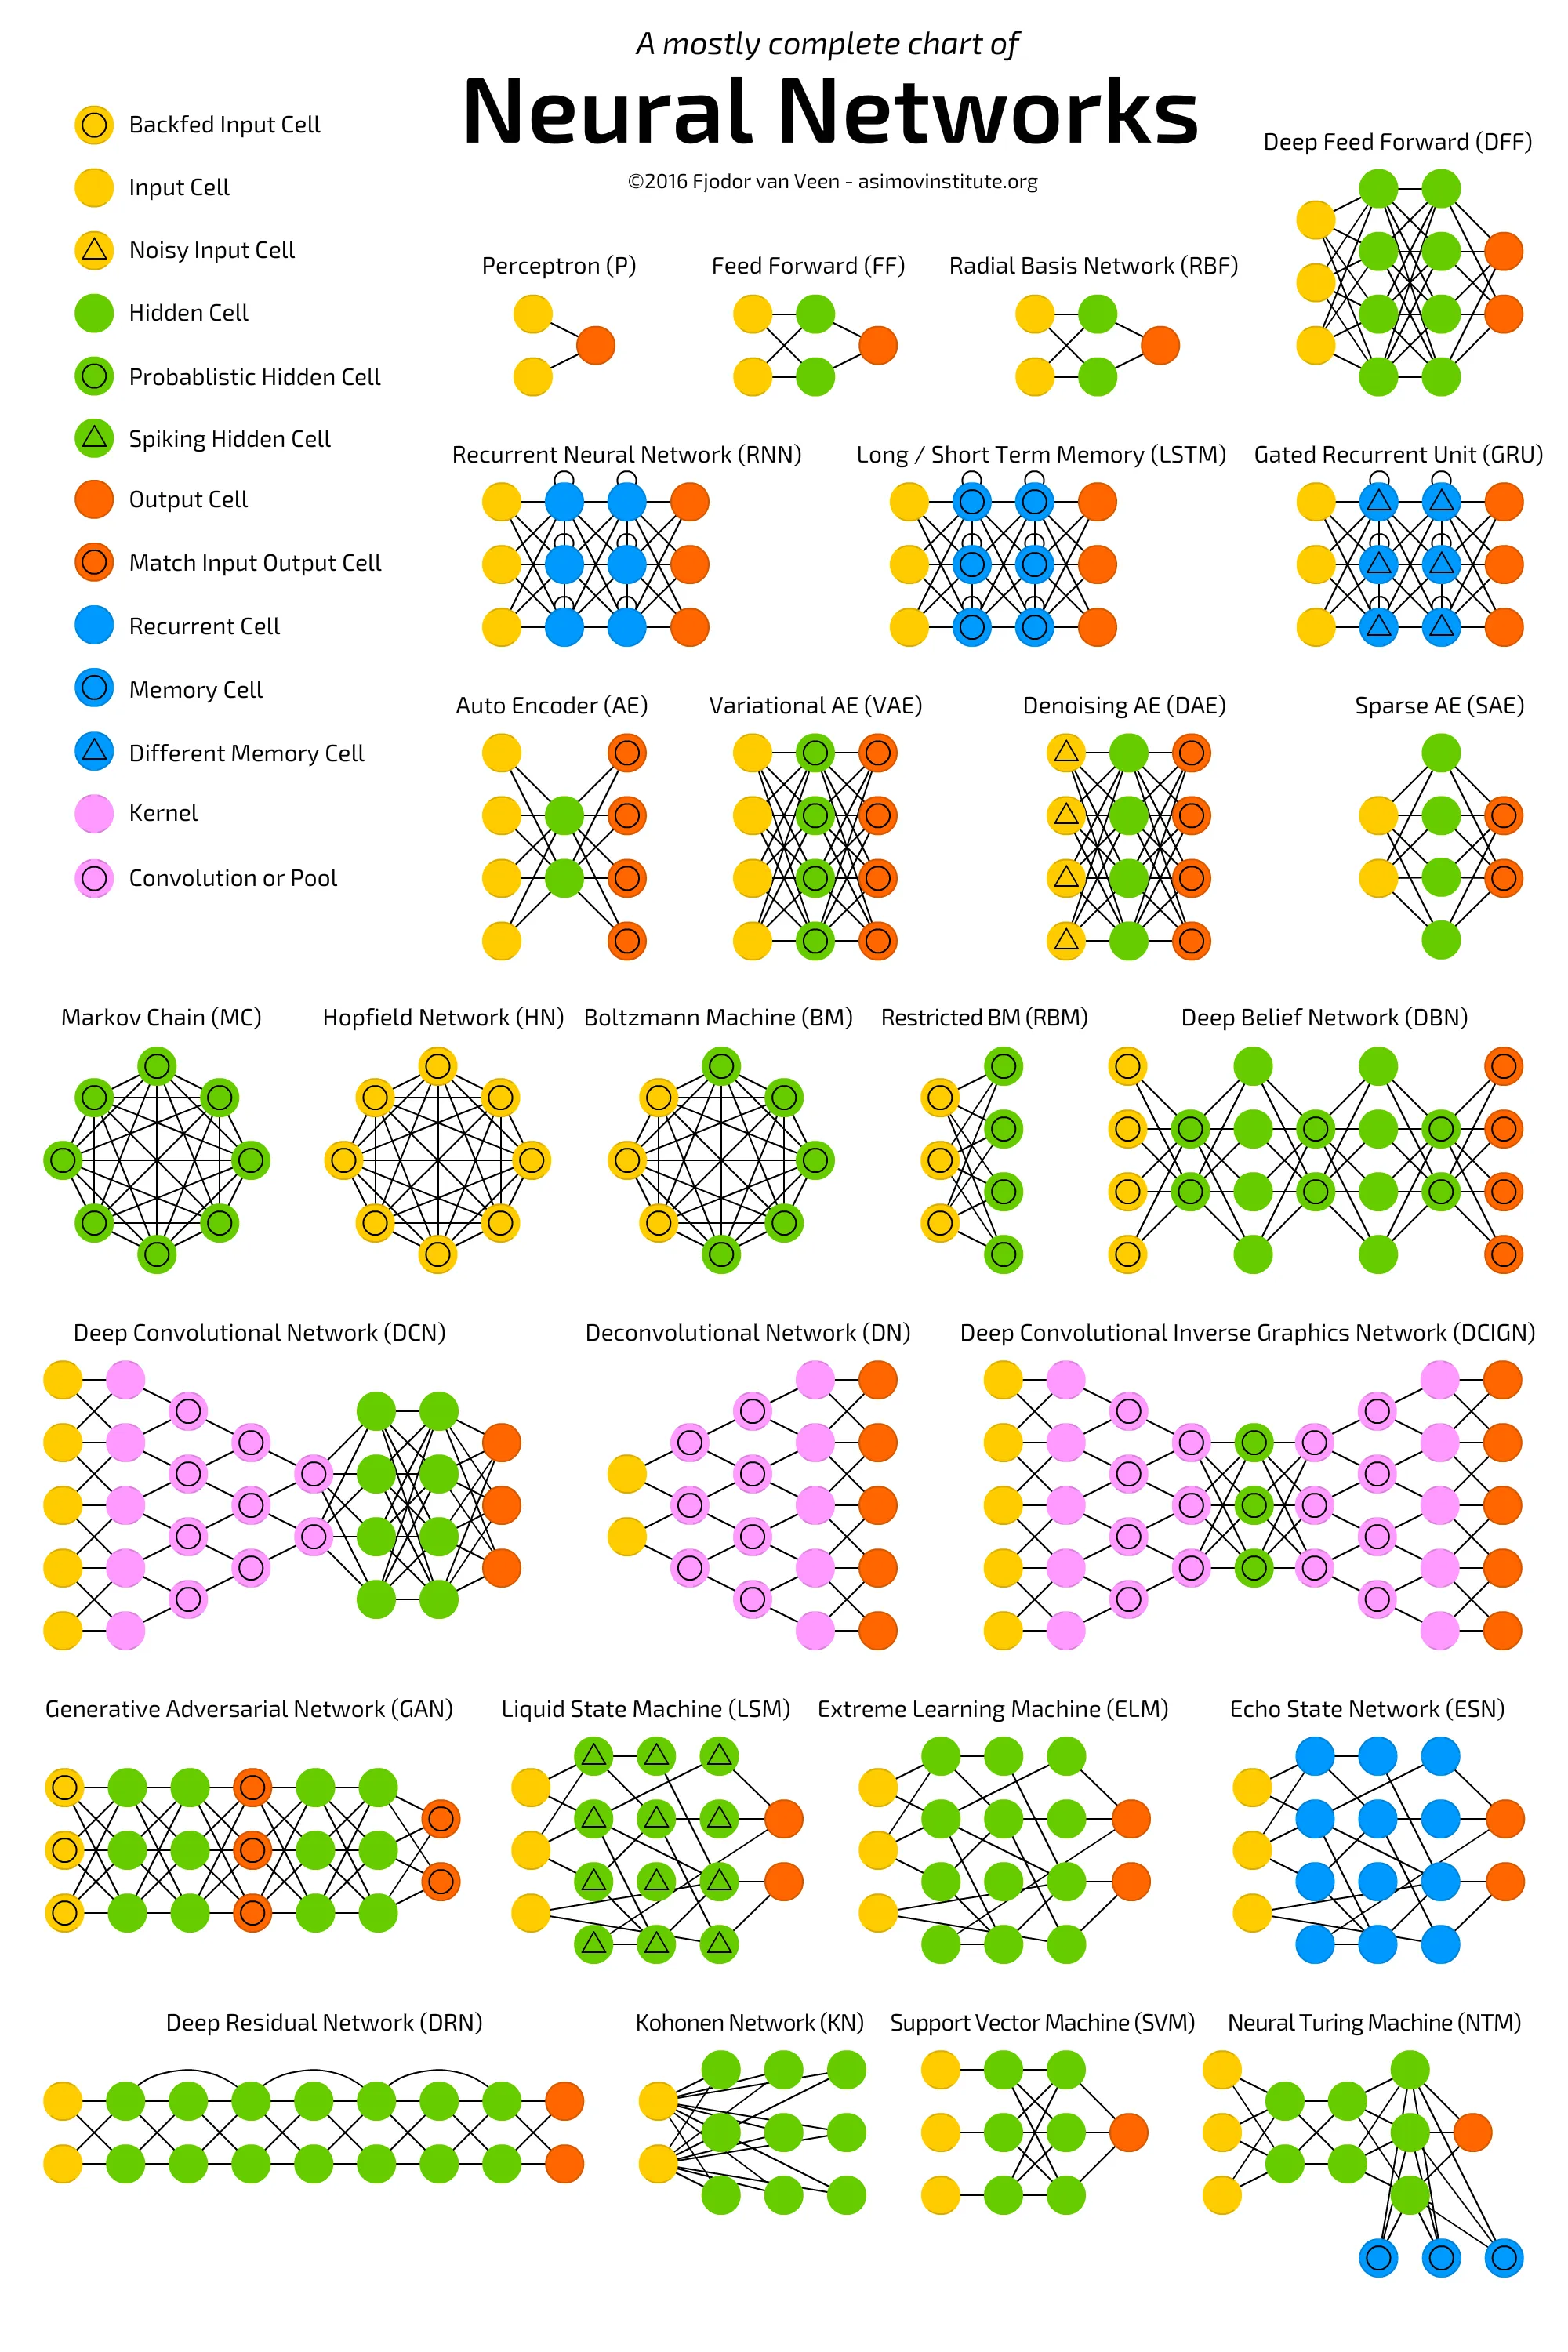

[Источник картинки](https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464)

В последующих заданиях можно использовать предоставленные датасеты ЛИБО найти какой-либо свой, обладающий схожими характеристиками.

### CNN (3 балла)

Свёрточные нейронные сети работают по принципу "возьмем фильтры с настраиваемыми весами и будем изменять эти веса так, чтобы фильтры выделяли те признаки, которые помогут нам решить задачу". Обычно свёрточные нейронные сети состоят из блоков свёртки и пулинга (уменьшение размерности), поверх которых добавляются несколько полносвязных линейных слоёв. [Визуализация работы свёрточной нейронной сети](https://poloclub.github.io/cnn-explainer/)

Будем решать задачу многоклассовой классификации. Датасет возьмем [отсюда](https://www.kaggle.com/datasets/puneet6060/intel-image-classification/data). Он содержит картинки с различными пейзажами. Присутсвуют такие классы, как 'buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'.

Скачайте датасет (можно использвоать библиотеку `opendatasets`)

In [ ]:
# od.download(
#     "https://www.kaggle.com/datasets/puneet6060/intel-image-classification/data"
# )

Создайте даталоадеры для тренировочных и тестовых данных. Используйте `torchvision.datasets.ImageFolder`. Одним из параметров данной функции является `transform`. Попробуйте применить к вашим данным какие-либо [трансформации](https://pytorch.org/vision/stable/transforms.html).

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import v2

train_path = "seg_train/seg_train"
test_path = "seg_test/seg_test"
# train_path = "intel-image-classification/seg_train/seg_train"
# test_path = "intel-image-classification/seg_test/seg_test"
batch_size = 256

transformer = v2.Compose(
    [
        v2.Resize((150, 150)),
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=(0.5,), std=(0.5,)),
    ]
)

train_dataset = ImageFolder(root=train_path, transform=transformer)
test_dataset = ImageFolder(root=test_path, transform=transformer)

train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_loader = DataLoader(train_dataset, batch_size, shuffle=False)

In [ ]:
train_dataset.class_to_idx

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

Выведем пару картинок, обратившись к содержимому даталоадеров.

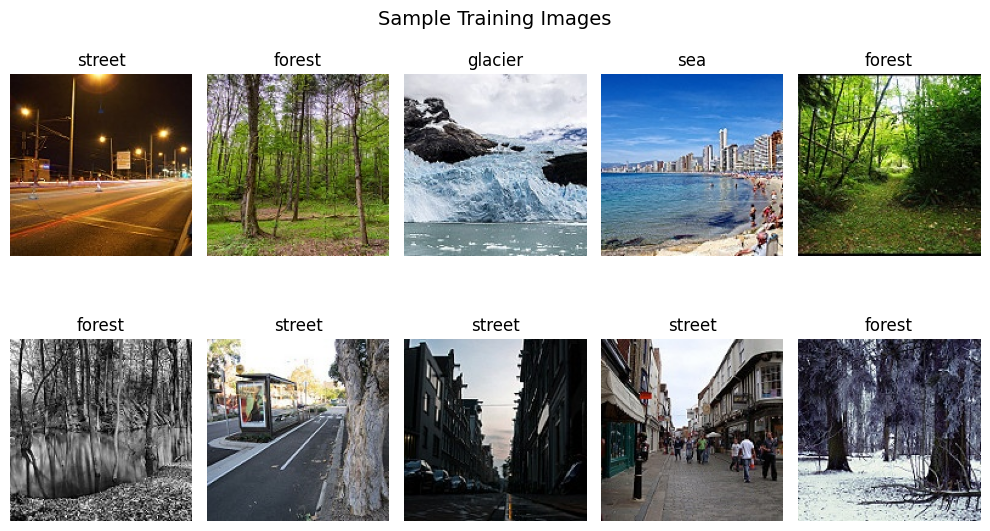

In [ ]:
images, labels = next(iter(train_loader))
class_names = train_loader.dataset.classes

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))
idx = 0

for i in range(2):
    for j in range(5):
        label = class_names[labels[idx].item()]
        ax[i, j].set_title(f"{label}")
        img = images[idx]
        img = (
            img / 2 + 0.5
        )  # обратное преобразование из-за трансформаций. возможно, вам оно не пригодится

        npimg = np.transpose(img.numpy(), (1, 2, 0))
        ax[i, j].imshow(npimg)
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=14)
plt.show()

Реализуйте свёрточную нейронную сеть и обучите её, используя тот же пайплайн, что и в предыдущем задании.

Задача не из простых, так как при использовании свёрточных нейронных сетей нужно внимательно следить за размерностями входных и выходных слоёв. Вам пригодятся такие слои, как Conv2d, BatchNorm2d, MaxPool2d, Linear или любые другие на ваше усмотрение. В качестве функции активации можно использовать ReLU.

Задача достаточно творческая, сфокусируйтесь на проведении экспериментов, а не на том, чтобы "выбить метрику". В данной задаче accuracy выше 0.7 на тесте будем считать хорошим результатом.

In [ ]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=6):
        super(ConvNet, self).__init__()
        self.layers = nn.ModuleList(
            [
                nn.Conv2d(
                    3, 16, (3, 3)
                ),  # (3, 150, 150) -> (16, 148, 148)
                nn.ReLU(),
                nn.Conv2d(
                    16, 32, (3, 3)
                ),  # (16, 148, 148) -> (32, 146, 146)
                nn.ReLU(),
                nn.MaxPool2d((2,2)), # (batch_size, 32, 146, 146) -> (batch_size, 32, 73, 73)
                nn.Flatten(),  # (batch_size, 32, 73, 73) -> (batch_size, 32*73*73)
                nn.Linear(32 * 73 * 73, 128),
                nn.ReLU(),
                nn.Linear(128, num_classes),
            ]
        )

    def forward(self, input):
        for layer in self.layers:
            output = layer(input)
            input = output
        return output

In [ ]:
model = ConvNet().to(device)
model

ConvNet(
  (layers): ModuleList(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=170528, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=6, bias=True)
  )
)

In [ ]:
loss_function = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [ ]:
num_epochs = 15
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    train_loss, train_accuracy = train(
        model, train_loader, criterion, optimizer, scheduler, device
    )
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    test_loss, test_accuracy = test(model, test_loader, criterion, device)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

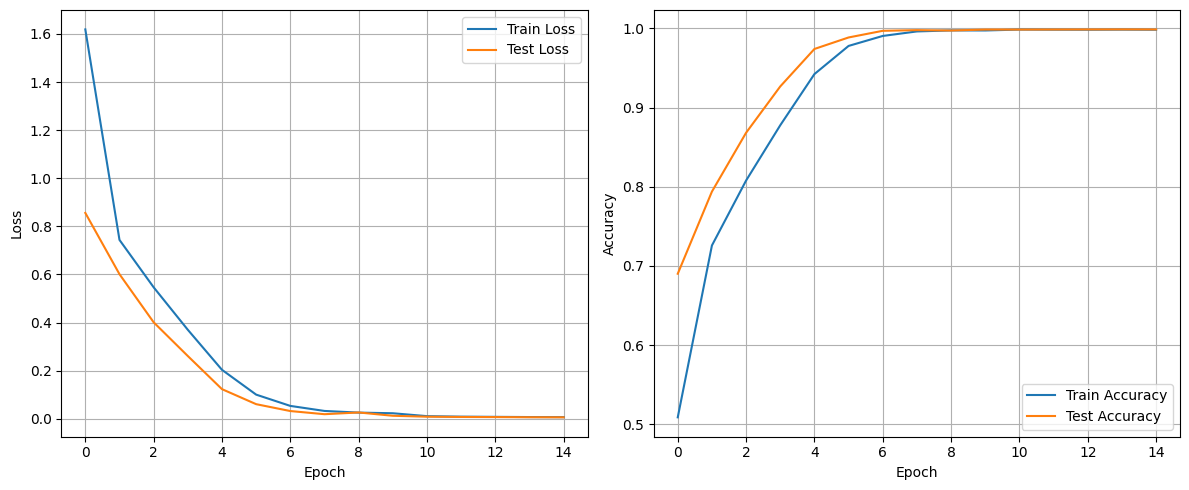

In [ ]:
plt.figure(figsize=(12, 5))
epochs = range(num_epochs)

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label="Train Accuracy")
plt.plot(epochs, test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Посмотрим, что наша модель предсказывает, на отложенной выборке. Так как для новых данных у нас отсутсвует разметка по классам, придется создать кастомный датасет для подгружения данных по частям. Подгрзить все картинки сразу нельзя - они не поместятся в оперативную память.

Создайте кастомный датасет для того, чтобы картинки подгружались динамически. [Пример можно найти здесь](https://www.learnpytorch.io/04_pytorch_custom_datasets/). Не забудьте применить трансормации, если вы использовали их при обучении модели.

Выведите пример того, что предсказывает ваша модель.

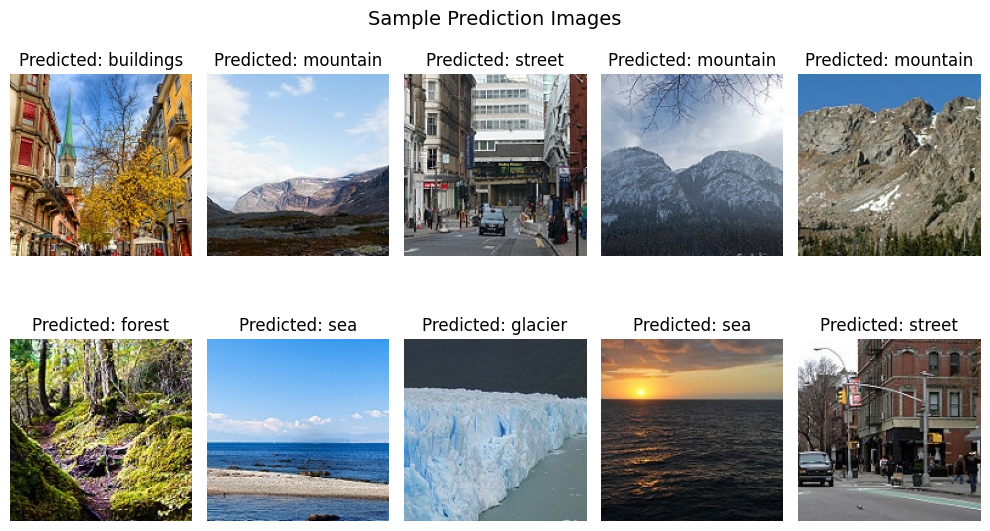

In [ ]:
import pathlib

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, transform=None):
        self.paths = list(pathlib.Path(root_dir).glob("*.jpg"))
        self.transform = transform

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        image_path = self.paths[idx]
        img = Image.open(image_path)
        if self.transform:
            return self.transform(img)
        else:
            return img


# pred_path = "intel-image-classification/seg_pred/seg_pred"
pred_path = "seg_pred/seg_pred"
pred_data = CustomDataset(pred_path, transform=transformer)

batch_size = 10
pred_loader = DataLoader(pred_data, batch_size=batch_size, shuffle=False)

model.eval()

images = next(iter(pred_loader)).to(device)

with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))
idx = 0

for i in range(2):
    for j in range(5):
        label = class_names[predicted[idx].item()]
        ax[i, j].set_title(f"Predicted: {label}")
        img = images[idx].cpu() / 2 + 0.5  # обратное преобразование из-за трансформаций. возможно, вам оно не пригодится
        npimg = np.transpose(img.numpy(), (1, 2, 0))
        ax[i, j].imshow(npimg)
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Prediction Images", fontsize=14)
plt.show()

### RNN (3 балла)

Recurrent Neural Network или рекуррентная нейронная сеть. Её логическим продолжением стала архитектура LSTM (Long Short-term Memory). Эти архитектуры призваны решать задачу обработки последовательностей и учитывают не только сигналы с непосредственно предыдщуего слоя, но и сигналы с более дальних слоёв.

[Здесь](https://qudata.com/ml/ru/NN_RNN_Torch.html) можно найти хорошее объяснение.

Будем решать задачу генерации текста. Принцип работы следующий: модель имеет представление обо всех словах словаря. На вход модель получает последовательность слов, её задача - определить, какое слово из словаря будет наиболее вероятным продолжением этой последовательности. То есть, по сути решается задача многоклассовой классификации.

В данном случае под "словом" понимает токен - то есть любая единица текстовых данных, которой присвоен код, - будь то буква, слог, слово или несколько слов сразу.

В качестве данных возьмем любую из книг "Игра престолов". Тексты книг можно найти [здесь](https://www.kaggle.com/datasets/khulasasndh/game-of-thrones-books).

Начнем с небольшой предобработки. Напишите функцию предобработки, которая приведет текст к нижнему регистру, удалит из него конструкции вида "Page n". Также удалим все символы, которые не являются буквами, пробелами, точками или вопросительными знаками. В том числе удалим переносы строк.

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mihaz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [ ]:
def preprocess_text(text: str):
    text = text.lower()
    text = re.sub(r'page\s+\d+', '', text)
    text = re.sub(r'[\r\n]+', ' ', text)
    text = re.sub(r'[^a-z\s\.\?]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

Теперь нам потребуется токенизатор, который будет присваивать словам числовые коды. В качестве метода разбиения текста на составные части предлагается использовать`sent_tokenize` и `word_tokenize` из `nltk`.

In [ ]:
class Tokenizer:
    def __init__(self):
        self.unknown_token = 'UNK'
        self.unknown_index = 0
        self.word2ind = {self.unknown_token: self.unknown_index}
        self.ind2word = {self.unknown_index: self.unknown_token}

    def fit(self, corpus: list[str]):
        # Заполнение словарей word2ind и ind2word
        corpus = " ".join(corpus)
        words = word_tokenize(corpus)
        vocab = set(words)
        for idx, word in enumerate(sorted(vocab), start=1):
            self.word2ind[word] = idx
            self.ind2word[idx] = word

    def text2ind(self, text):
        words = word_tokenize(text)
        sequence = [self.word2ind.get(word, self.unknown_index) for word in words]
        return sequence

    def ind2text(self, sequence):
        words = [self.ind2word.get(index, self.unknown_token) for index in sequence]
        return words

Подготовим датасет. Для обучения модели было бы неплохо привести все подаваемые на вход сети последовательности к одной длине. Можно работать и с последовательностями разной длины, если объединять их в батчи, где длины совпадают, но сейчас мы будем придерживаться более простой тактики.

Реализуйте функцию `split_sentences_into_chunks`, которая будет возвращать последовательности длиной `max_seq_length + 1` (единица, так как в дальнейшем крайнее правое слово станет таргетом). Будем добавлять паддинг слева, если длина текста не делится на `max_seq_length + 1` нацело. В качестве значения для паддинга можете использовать `tokenizer.unknown_index`.

In [ ]:
def split_sentences_into_chunks(sentences: list[str], tokenizer: Tokenizer, max_seq_length=8):
    # chunks = []
    # chunk_length = max_seq_length + 1

    # for sentence in sentences:
    #     indices = tokenizer.text2ind(sentence)
    #     sent_len = len(indices)
    #     remainder = sent_len % chunk_length

    #     if remainder != 0:
    #         pad_length = chunk_length - remainder
    #         indices = [tokenizer.unknown_index] * pad_length + indices

    #     for i in range(0, len(indices), chunk_length):
    #         chunk = indices[i:i + chunk_length]
    #         chunks.append(chunk)

    # return chunks
    all_indices = []
    for sentence in sentences:
        all_indices += tokenizer.text2ind(sentence)

    chunk_length = max_seq_length + 1
    remainder = len(all_indices) % chunk_length

    if remainder != 0:
        pad_length = chunk_length - remainder
        all_indices = [tokenizer.unknown_index] * pad_length + all_indices

    chunks = []
    for i in range(0, len(all_indices), chunk_length):
        chunk = all_indices[i:i + chunk_length]
        chunks.append(chunk)

    return chunks


Теперь создадим класс датасета. Единственная его задача - разделять входную последовательность на то, по чему мы предсказываем, и то, что мы предсказываем. На выходе должны получаться пары вида ([токены], токен).

In [ ]:
class TextDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        chunk = self.data[idx]
        X = chunk[:-1]
        y = chunk[-1]
        return torch.tensor(X), torch.tensor(y)

Сложим всё воедино:

In [ ]:
all_text = ""

for i in range(1, 6):  # 001ssb.txt до 005ssb.txt
    filename = f"game-of-thrones-books/00{i}ssb.txt"
    with open(filename, "r") as file:
        all_text += file.read() + " "


In [ ]:
# with open("game-of-thrones-books/001ssb.txt", "r") as file:  # файл с книгой
#     text = file.read()
# with open("/content/game-of-thrones-books/001ssb.txt", "r") as file:  # файл с книгой
#     text = file.read()

preprocessed_text = preprocess_text(all_text)

sentences = sent_tokenize(preprocessed_text)
tokenizer = Tokenizer()
tokenizer.fit(sentences)

data = split_sentences_into_chunks(sentences, tokenizer, max_seq_length=10)
random.shuffle(data)

split_ratio = 0.9  # кастомное разбиение на train-test
train_data = data[: int(split_ratio * len(data))]
test_data = data[int(split_ratio * len(data)) :]

train_dataset = TextDataset(train_data)
test_dataset = TextDataset(test_data)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

for X_batch, y_batch in train_loader:
    print("X_batch shape:", X_batch.shape)
    print("y_batch shape:", y_batch.shape)
    break

X_batch shape: torch.Size([32, 10])
y_batch shape: torch.Size([32])


Создайте нейронную сеть минимум из следующих слоев: `Embedding`, `LSTM`, `Dropout`, `Linear`.

In [ ]:
class TextGenModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim=512, hidden_dim=512):
        super().__init__()
        self.layers = nn.ModuleDict({
            "emb": nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim), # (batch_size, seq_len) -> (batch_size, seq_len, embedding_dim)
            # "rnn": nn.RNN(embedding_dim, hidden_dim, batch_first=True), # (batch_size, seq_len, embedding_dim) -> (batch_size, seq_len, hidden_dim), (1, batch_size, hidden_dim)
            "lstm": nn.LSTM(embedding_dim, hidden_dim, batch_first=True), # (batch_size, seq_len, embedding_dim) -> (batch_size, seq_len, hidden_dim), ((1, batch_size, hidden_dim), (1, batch_size, hidden_dim))
            "dropout": nn.Dropout(0.5),
            "fc": nn.Linear(hidden_dim, vocab_size) # (batch_size, hidden_dim) -> (batch_size, vocab_size)
        })

    def forward(self, x):
        embeddings = self.layers['emb'](x)
        out, (h_last, c_last) = self.layers['lstm'](embeddings)
        out = out[:, -1, :]
        out = self.layers["dropout"](out)
        logits = self.layers["fc"](out)
        return logits


Обучите модель. Можно использовать тот же пайплайн, что и в предыдущих заданиях.

Нужно отметить, что Accuracy не очень подходит в качестве метрики для задач генерации текста, так как явялется очень грубым приближением качества. Будем ориентироваться не на значение метрики, а на динамику.

Если ваша модель при инференсе не выдает `unk` бесконечно, значит вы всё сделали правильно.

In [ ]:
model = TextGenModel(len(tokenizer.ind2word)).to(device)
model

TextGenModel(
  (layers): ModuleDict(
    (emb): Embedding(26136, 512)
    (lstm): LSTM(512, 512, batch_first=True)
    (dropout): Dropout(p=0.5, inplace=False)
    (fc): Linear(in_features=512, out_features=26136, bias=True)
  )
)

In [ ]:
loss_function = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [ ]:
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss, _ = train(
        model, train_loader, criterion, optimizer, scheduler, device
    )
    train_losses.append(train_loss)

    test_loss, _ = test(model, test_loader, criterion, device)
    test_losses.append(test_loss)


  0%|          | 0/4951 [00:00<?, ?it/s]

  0%|          | 0/551 [00:00<?, ?it/s]

  0%|          | 0/4951 [00:00<?, ?it/s]

  0%|          | 0/551 [00:00<?, ?it/s]

  0%|          | 0/4951 [00:00<?, ?it/s]

  0%|          | 0/551 [00:00<?, ?it/s]

  0%|          | 0/4951 [00:00<?, ?it/s]

  0%|          | 0/551 [00:00<?, ?it/s]

  0%|          | 0/4951 [00:00<?, ?it/s]

  0%|          | 0/551 [00:00<?, ?it/s]

  0%|          | 0/4951 [00:00<?, ?it/s]

  0%|          | 0/551 [00:00<?, ?it/s]

  0%|          | 0/4951 [00:00<?, ?it/s]

  0%|          | 0/551 [00:00<?, ?it/s]

  0%|          | 0/4951 [00:00<?, ?it/s]

  0%|          | 0/551 [00:00<?, ?it/s]

  0%|          | 0/4951 [00:00<?, ?it/s]

  0%|          | 0/551 [00:00<?, ?it/s]

  0%|          | 0/4951 [00:00<?, ?it/s]

  0%|          | 0/551 [00:00<?, ?it/s]

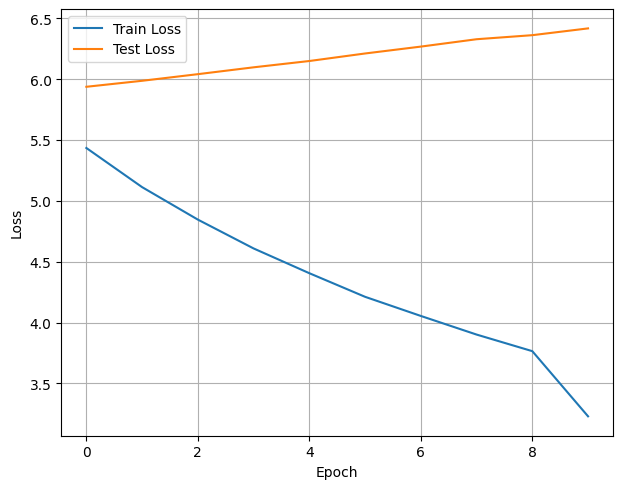

In [ ]:
plt.figure(figsize=(12, 5))
epochs = range(num_epochs)

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
model.eval()
num_examples = 5
loader = DataLoader(test_dataset, batch_size=1, shuffle=True)
count = 0
with torch.no_grad():
    for X, y_true in loader:
        X = X.to(device)  # (1, seq_len)
        y_true = y_true.to(device)  # (1)

        logits = model(X)  # (1, vocab_size)
        y_pred = torch.argmax(logits, dim=1)  # (1)

        input_tokens = tokenizer.ind2text(X[0].cpu().tolist())
        true_token = tokenizer.ind2word[y_true.item()]
        pred_token = tokenizer.ind2word[y_pred.item()]

        print(f"Input       : {' '.join(input_tokens)}")
        print(f"Target word : {true_token}")
        print(f"Predicted   : {pred_token}")
        print("-" * 50)

        count += 1
        if count >= num_examples:
            break

Input       : thrashed beneath his cloak and whimpered something that might have
Target word : been
Predicted   : been
--------------------------------------------------
Input       : and began to read about the properties of dragonbone .
Target word : dragonbone
Predicted   : the
--------------------------------------------------
Input       : sterner stuff . a great lady knew how to behave
Target word : at
Predicted   : .
--------------------------------------------------
Input       : to the ground . lord sawane had rebuilt in stone
Target word : for
Predicted   : and
--------------------------------------------------
Input       : hair would not grow over the scar so a shiny
Target word : seam
Predicted   : of
--------------------------------------------------


Попробуйте сгенерировать вашей моделью какой-либо текст. Похоже на слог "Игры престолов"?

In [ ]:
def generate_text(
    seed_text,
    tokenizer,
    model,
    max_seq_length=8,
    max_len=120,
    device="cpu",
    stops=["."],
):
    stops = [
        tokenizer.word2ind.get(stop) for stop in stops
    ]  # если мы встретили какой-либо из данных символов, то прекращаем генерацию

    model.eval()
    with torch.no_grad():
        seed_tokens = tokenizer.text2ind(seed_text)  # токенизируем текст
        current_tokens = seed_tokens[:]

        if (
            len(current_tokens) < max_seq_length
        ):  # добавим паддинг, если текст слишком короткий
            current_tokens = [tokenizer.unknown_index] * (
                max_seq_length - len(current_tokens)
            ) + current_tokens

        while len(current_tokens) < max_len:
            inputs = (
                torch.tensor(current_tokens[-max_seq_length:]).unsqueeze(0).to(device)
            )

            outputs = model(inputs)  # предсказания модели
            _, predicted = torch.max(
                outputs, 1
            )  # возьмем самый вероятный токен. можно брать случайный из какого-то топа, чтобы добавить случайность
            current_tokens.append(predicted.item())

            if current_tokens[-1] in stops:
                break

    return ' '.join(tokenizer.ind2text(
        current_tokens
    ))

In [ ]:
print(generate_text("winter is", tokenizer, model, max_len=120, device=device))

UNK UNK UNK UNK UNK UNK winter is coming .


In [ ]:
print(generate_text("you", tokenizer, model, max_len=120, device=device))

UNK UNK UNK UNK UNK UNK UNK you would be a fool .


In [ ]:
print(generate_text("i am", tokenizer, model, max_len=120, device=device))

UNK UNK UNK UNK UNK UNK i am .


In [ ]:
print(generate_text("when the", tokenizer, model, max_len=120, device=device))

UNK UNK UNK UNK UNK UNK when the old man was done .


In [ ]:
print(generate_text("it was a", tokenizer, model, max_len=120, device=device))

UNK UNK UNK UNK UNK it was a great host at the moment .


Если интересно, можно изучить и попробовать повторить [туториал про работу LLM](https://levelup.gitconnected.com/building-a-million-parameter-llm-from-scratch-using-python-f612398f06c2). Кажется, что результаты той модели должны быть лучше, нежели однослойной LSTM-ки :)

### Что еще?

Лабораторная работа получилось достаточно объемной, поэтому мы не будем рассматривать в ней перенос обучения и fine-tuning. Однако при желании вы можете изучить материалы самостоятельно. [Про разницу transfer learning-а и fine-tuning-а](https://dev.to/luxacademy/understanding-the-differences-fine-tuning-vs-transfer-learning-370).

Основная идея переноса обучения заключается в том, что кто-то уже обучил сложную и тяжелую нейронную сеть за нас, а мы теперь используем признаки, которые эта сеть умеет находить, для решения нашей задачи, надстраивая над ней небольшую "шапку", которую мы и обучаем.

Fine-tuning очень похож на перенос обучения, но помимо обучения "шапки" мы так же размораживаем для обучения часть весов модели.

[Хороший пример дообучения BERT-а для задачи анализа тональности](https://github.com/curiousily/Getting-Things-Done-with-Pytorch/blob/master/08.sentiment-analysis-with-bert.ipynb).